## Hypergeometric Statistics
### Sample Size and Confidence Interval Examples

The first example will utilize the `hypergeom_ss` function to calculate a 2 sided 95% confidence level sample size assuming a population size of 50,000 and expected error rate of 1% and a desired confidence interval precision of 2%.  Then based on that recommended sample size utilize the `hypergeom_ci` function to calculate the actual confidence interval assuming sample errors of 3.

In [1]:
# Import libraries
from hypergeom_stats import hypergeom_ci, hypergeom_ss
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Declare some example input variables for sample size calculation
# Upper/Lower/Both
tail = "both"
# Confidence Level
cl = .95
# Population
N = 50000
# Expected Error Rate
p = .01
# Desired Precision
B = .02

In [3]:
# Get sample size and all loop results for example plots
n_final, prec_exact_final, all_ss_results = hypergeom_ss(tail,cl,N,p,B)

# Show sample size
n_label = f"Recommended Sample Size: {n_final}"
print(n_label)

# Show final precision exact
prec_label = f"Precision Exact: {prec_exact_final*100:,.4f}"
print(prec_label)

# Create datafame
ss_df = pd.DataFrame(all_ss_results)

Recommended Sample Size: 284
Precision Exact: 1.9957


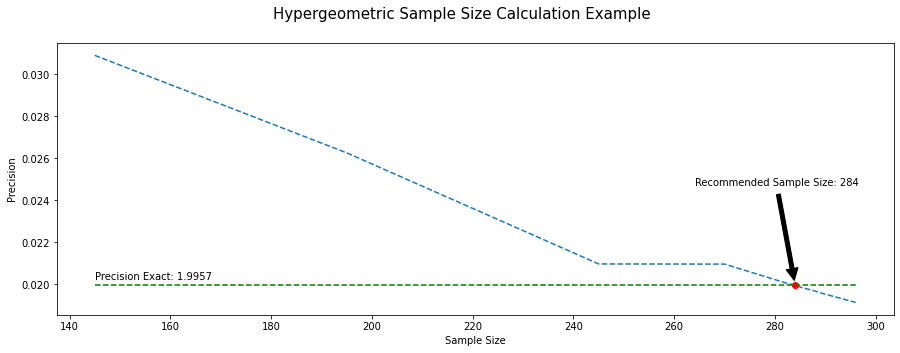

In [4]:
# Create plot figure and axis
fig, ax = plt.subplots(figsize=(15,5))
# Add title
fig.suptitle("Hypergeometric Sample Size Calculation Example", size=15)
# Sort data by precision exact
ss_df.sort_values(by='prec_exact', ascending=False, inplace=True)
# Add in precision exact final constant for line chart
ss_df['prec_exact_final'] = prec_exact_final
# Plot main chart
ax.plot(ss_df['n'], ss_df['prec_exact'], linestyle='--')
# Add sample size dot
ax.plot(n_final, prec_exact_final, marker='o', color='r')
# Add precision exact horizontal line
ax.plot(ss_df['n'], ss_df['prec_exact_final'], linestyle='--', color='g')
# Add sample size annotation
ax.annotate(n_label, xy=(n_final, prec_exact_final),
            xytext=(-100, 100), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),)
# Precision exact chart label
prec_label = f"Precision Exact: {prec_exact_final*100:,.4f}"
# Add precision exact annotation
ax.annotate(prec_label, xy=(ss_df.loc[0,'n'], ss_df.loc[0,'prec_desired'] + .0002))
# Set axis labels
ax.set_xlabel('Sample Size')
ax.set_ylabel('Precision')
plt.savefig('example-sample-size.png')
plt.show()

In [5]:
# Confidence Interval
ci = 2
# Number of errors
X = 3

# Lower confidence limit
lower_results, lower_all_results = hypergeom_ci("lower",ci,cl,X,n_final,N)
lower_conf_limit = lower_results["conf_limit"]

# Upper confidence limit
upper_results, upper_all_results = hypergeom_ci("upper",ci,cl,X,n_final,N)
upper_conf_limit = upper_results["conf_limit"]

# Precision exact
ss_p = round(float(X)/n_final,6)
prec_exact = round(max(ss_p-lower_conf_limit,upper_conf_limit-ss_p),6)

lower_df = pd.DataFrame(lower_all_results)
upper_df = pd.DataFrame.from_dict(upper_all_results)

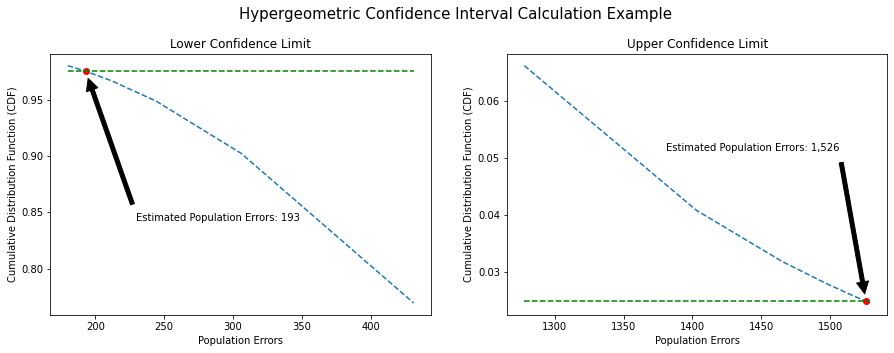

In [6]:
# Create plot figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False)
# Add Title
fig.suptitle("Hypergeometric Confidence Interval Calculation Example", size=15)
# Adjust spacing between super title and plot title
fig.subplots_adjust(top=.85)

# List of dfs for loop
dfs = [lower_df, upper_df]
# Plot titles
titles = ['Lower Confidence Limit', 'Upper Confidence Limit']
# For demo just hard code coords for annotations
xytext_coords = [(50, -150), (-200, 150)]
# Loop to create plots
for i, df in enumerate(dfs):
    ax = axes[i]
    df2 = df.copy()
    # Sort dataframe for plotting purposes
    df2.sort_values(by='cdf', ascending=False, inplace=True)
    # Isolate row for the final result
    result = df2[df2['loop_cond']==1]
    # Estimated population errors
    errors = result['est_errors'].values[0]
    # Cumulative distribution function
    cdf = result['cdf'].values[0]
    # Add cdf to dataframe for reference line
    df2['cdf_final'] = cdf
    # Add main plot
    ax.plot(df2['est_errors'], df2['cdf'], linestyle='--')
    # Add red dot for result
    ax.plot(errors, cdf, marker='o', color='r')
    # Reference line
    ax.plot(df2['est_errors'], df2['cdf_final'], linestyle='--', color='g')
    # Annotation label
    label = f"Estimated Population Errors: {errors:,.0f}"
    # Add annotation
    ax.annotate(label, xy=(errors, cdf),
             xytext=xytext_coords[i], textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))
    # Add titles
    ax.set_title(titles[i])
    # xy labels
    ax.set_xlabel('Population Errors')
    ax.set_ylabel('Cumulative Distribution Function (CDF)')
plt.savefig('example-confidence-interval.png')